### Quantum Full Adder HW 2.1 ###

Qiskit documentation used:
 1.   https://qiskit.org/textbook/ch-states/representing-qubit-states.html 
 2.  https://qiskit.org/textbook/ch-demos/chsh.html

Here, I have the standard 'import' statements gathered from the qiskit documentation.

In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, Aer, IBMQ, transpile
from numpy import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
import time

## Connecting circuit to the quantum computer

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

Scale the size of the system to the amount of qubits necessary. Rename the circuit.

In [3]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


Zero all qubits. Add NOT gates to test the case for 111. `circuit.x(qred_q[0])` is starting each qubit to be 1.
# Full Adder
`q[3]` is our sum bit. If any qubit is 1, then this qubit will also be 1. 
`q[4]` is our carry bit. Two qubits need to be 1.
For the case of 11111, we expect (1+1+1) = 3 (or 11 for the last two qubits).

In [4]:
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
circuit.reset(qreg_q[4])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[4])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])

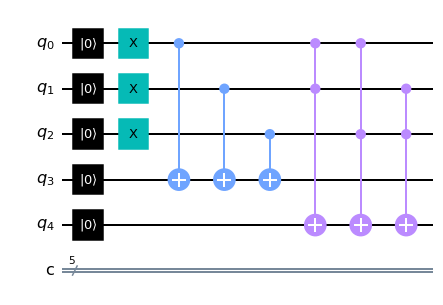

In [5]:
circuit.draw()

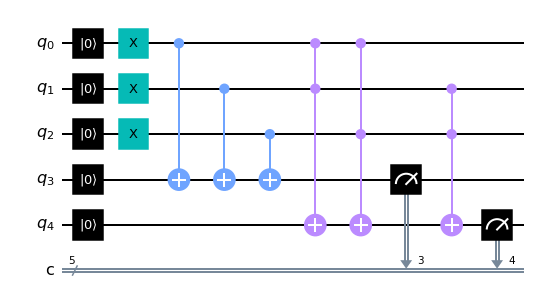

In [6]:
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.draw()

Transpile the circuit and send to the quantum computer you are using.
In this example, I am using *quito*

In [7]:
tic = time.time()
transpiled_circuits = transpile(circuit, quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
12.69481086730957


We can see that the probability of getting state (11000) is present in the following histogram, which is the intended state to be measured for (1+1+1) = 3

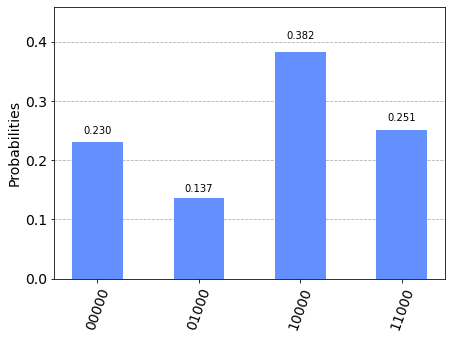

In [8]:
counts = result_real.get_counts(circuit)
plot_histogram(counts)